MS INTELLIGENCE ARTIFICIELLE 

2022-2023

TÉLÉCOM PARIS

                                                                    YIBOE Ossee


## **Thème : Apprentisage des modèles à énergie - Machine de Boltzman restreintre**

## Objectifs :

- Restitution au propre et avec commentaires et interprétations de ce que nous avons fait en cours: d'abord sur les modèles à énergie, puis sur l'utilisation du RBM.

- Concernant les attentes pour le code, il est souhaitable d'utiliser le code pour étudier l'impact des différents paramètres sur l'entrainements et la qualité des images reconstruites. 

- Mais de base il est déjà priortaire d'avoir un code fonctionnel qui permet d'instancier un objet de type RBM, d'entraîner par batch sur les données MNIST binarisées, et enfin après l'entrainement d'échantillonner le modèle de RBM pour obtenir de nouvelles images MNIST.

## Présentation des modèles à énergie et Particuliarités

On considère un processus d'intéret observable $X=(X_s)_{s \in S} $ et un processus $Y=(Y_s)_{s \in S} $ inobservable.

Chaque $X_s$ est à valeurs dans $\Omega=\{1,...,K\}$ et chaque $Y_s$ à valeurs finies ou continues. La loi du couple $(X,Y)$ est de la forme :

$$
\mathbb{P}_{\theta}(x,y) = \frac{e^{-E_{\theta}(x,y)}}{Z_{\theta}}
$$

La quantité $E_{\theta}(x)$ est appelée « énergie » et on appelle modèle à énergie tout modèle vérifiant :  $$ P_{\theta}(x,y) > 0 $$ pour tout x , y.

La dite fonction à énergie, est telle que:

$$
E_{\theta}(x) = 0 \space (good) \\
E_{\theta}(x) > 0 \space (bad)
$$

Soit $ E_{\theta}(x) $ une fonction d'énergie.

 Ainsi, nous pourrons définir $ \mathbb{P}_{\theta}(x) $ suivant une loi de probabilité à l'aide de la fonction suivante :

$$
\mathbb{P}_{\theta}(x) = \frac{e^{-E_{\theta}(x)}}{Z_{\theta}} = \frac{e^{-E_{\theta}(x)}}{\int e^{-E_{\theta}(x)}dx} \space , \space\space\space Z_{\theta} = \int e^{-E_{\theta}(x)}dx
$$

Où $ Z\theta $ est une constante de normalisation pour que $ \mathbb{P}_{\theta}(x) $ suive une loi de probabilité. 

La fonction Softmax nous permet de normaliser les valeurs entre $ [0,1] $ et construire une distribution de probabilité.



## Gradient stochastique

Soit un ensemble de $ N $ observations $ \mathcal{D} $ indépendantes et identiquement distribuées $x_i$.

Supposons que $X=(X_s)_{s \in S}$ est observable, avec


Dans les modèles d'intéret précisés ultérieurement l'énergie $ E_{\theta}(x) $ est calculable et $Z_{\theta}$ ne l'est pas.

Le problème vient du fait que le nombre de réalisations possibles de $x$, est trop grand pour que la somme $\sum_{i=1}^N -E_{\theta}(x)$ puisse etre calculée.


L'objectif général est d'estimer les paramètres (poids et biais) à partir des données observables.

On cherche donc à estimer le paramètre $ \theta $ à partir de $x$ par la méthode du maximum de vraisemblance. 

Cela revient , à $x$ donné, à rechercher le maximum de : 

$${f_\theta}=log\mathbb{P}_{\theta}(x) $$
ou à minimiser :
$${f_\theta}=-log\mathbb{P}_{\theta}(x) $$.

Soit :
$$
\sum_{i=1}^N \log\mathbb{P}_{\theta}(x_i)
$$


On note $f'(\theta^q)$, le gradient de $f(\theta^q)$ (à $x$ fixé).

L'algorithme du gradient est une méthode itérative produisant une suite $\theta_0$,...,$\theta_q$, ... selon le principe suivant :

- $(i)$ on se donne $\theta_0$ 

- $(ii)$ on se donne « un pas » ${\Delta}{\theta}$. Alors 
$$
{\theta}^{q+1} \space=\space \theta^q\space\space +\space \Delta\theta \space f'(\theta^q)
$$

Le problème est alors double:
- le pas ${\Delta}{\theta}$ doit etre bien choisi;
- la suite $\theta_0$,...,$\theta_q$, ...  peut etre piégée dans un maximum local.

- L'idée du gradient stochastique est de remédier au deuxième point en permettant l'évolution de chaque ${\theta}^{q+1}$ dans un sens différent de celui de $f'(\theta^q)$.


Notons que l'utilisation du logarithme népérien nous permet ici d'éviter d'obtenir des probabilités qui tombent à zéro.

L'expression de  $ \mathbb{P}_{\theta}(x) $ devient :

$$
\log \mathbb{P}_{\theta}(x) = \log(e^{-E_{\theta}(x)}) \log(\frac{1}{\int e^{-E_{\theta}(x)}dx}) \space , \space\space\space \log(\frac{1}{x}) = - \log(x)
$$

$$
\log \mathbb{P}_{\theta}(x) = -E_{\theta}(x) -\log(\int e^{-E_{\theta}(x)}dx)
$$
$$
\log \mathbb{P}_{\theta}(x) = -E_{\theta}(x) -\log(Z_{\theta})
$$



$Z_{\theta}$ étant inconnue on utilise la méthode du Gradient stochastique et on obtient :

$$
\nabla_{\theta} \log\mathbb{P}_{\theta}(x) = -\nabla_{\theta}E_{\theta}(x) -\frac{\nabla_{\theta}Z_{\theta}}{Z_{\theta}}
$$

$$
\nabla_{\theta} \log\mathbb{P}({\mathcal{D}|\theta})) = \sum_{i=1}^N \nabla_{\theta} \log\mathbb{P}_{\theta}(x_i)
$$

Or : 
$$ 
\log\mathbb{P}_{\theta}(x) = -E_{\theta}(x) - \log Z_{\theta} 
$$ 
et 
$$ 
\nabla_{\theta} \log f_{\theta} = \frac{1}{f_{\theta}} \nabla_{\theta} f_{\theta} 
$$
    
On obtient par la suite :

$$
\nabla_{\theta} \log\mathbb{P}_{\theta}(x) = -\nabla_{\theta}E_{\theta}(x) -\frac{\nabla_{\theta}Z_{\theta}}{Z_{\theta}}
$$

$$
\nabla_{\theta} \log\mathbb{P}_{\theta}(x) = -\nabla_{\theta}E_{\theta}(x) -\frac{\int \nabla_{\theta}e^{-E_{\theta}(x)}dx}{Z_{\theta}}
$$

$$
\nabla_{\theta} \log\mathbb{P}_{\theta}(x) = -\nabla_{\theta}E_{\theta}(x) +\int \nabla_{\theta}E_{\theta}(x) \frac{e^{-E_{\theta}(x)}}{Z_{\theta}}dx \space , \space\space\space \frac{e^{-E_{\theta}(x)}}{Z_{\theta}} = \mathbb{P}_{\theta}(x) 
$$

$$
\nabla_{\theta} \log\mathbb{P}_{\theta}(x) = -\nabla_{\theta}E_{\theta}(x) + \mathbb{E}_{\mathbb{P}_{\theta}}(\nabla_{\theta}E_{\theta}(x))
$$

D'ou l'expression suivante de calcul du gradient stochastique:

$$
\nabla_{\theta} \log\mathbb{P}({\mathcal{D}|\theta})) = \sum_{i=1}^N \nabla_{\theta} \log\mathbb{P}_{\theta}(x_i) = \sum_{i=1}^N -\nabla_{\theta}E_{\theta}(x_i) + N \mathbb{E}_{\mathbb{P}_{\theta}}(\nabla_{\theta}E_{\theta}(x))
$$



## Les Machines de Boltzmann Restreinte (MBR)


Pour des raisons historiques, on appellera dans la suite les variables cachées $H$ (de « hidden » en anglais) et les variables observées V (de « visible »).

Une machine de Boltzman restreinte est un modèle à énergie avec une matrice de poids $S= I*J$, $H=(H_i)_{i \in I}$,$V=(V_J)_{j \in J}$, les $(H_i)$, $(V_i)$ étant à valeurs respectivement dans des ensembles finis $H$, $V$.

La machine de Boltzman, dans sa forme originale, est un réseau de neurones qui possède la particularité de connecter l’ensemble des neurones entre eux. Il s’agit d’un réseau à usage principalement théorique, du fait que l’information y est distribuée de façon parallèle et pour sa proximité avec les concepts du connexionnisme. Dans sa version dite « restreinte » (qui possède quant à elle un certain nombre d’applications pratiques), on trouve un système fait uniquement de deux couches : une couche avec des neurones en entrée, et une couche avec des neurones cachés. L’ensemble de ces neurones sont interconnectés entre eux. De façon assez similaire aux réseaux autoencoders, la couche cachée comporte souvent moins de dimensions que la couche visible (bien que ce ne soit pas toujours le cas). Pour illustrer le concept, voici un schéma d’une machine de Boltzmann restreinte :

![](https://drive.google.com/uc?export=view&id=1QpsevABbqlzp0wp_IayFFj6yjU1WsSvC)

On dit donc d'une machine de Boltzmann qu'elle est restreinte, lorsqu'il n'existe aucun lien direct entre les noeuds de la couche visible et entre les noeuds de la couche cachée ( Confère l'image ci-dessus). 



Ici, notre fonction d'énergie est définit de la manière suivante :
$$
E_{\theta}(v,h) = -h^TWv -a^Tv -b^Th \mathbb{P}_{\theta}(v,h) = \frac{e^{-E_{\theta}(v,h)})}{Z\theta}
$$

Pour appliquer le gradient stochastique on doit calculer-ou approcher- $E_{\theta}(H,V)$ et $E_{\theta}(H,v/v)$.

Le premier utilise une approximation stochastique , alors que le deuxième se calcule de manière exacte.

En effet, la propriété intéressante des MBR est que les variables $H=(H_i)_{i \in I}$ sont indépendantes conditionnellement à $V=v$ et les variables $V=(V_J)_{j \in J}$ sont indépendantes conditionnellemnt à $H=h$

Les lois de $H_i$ conditionnelles à $V=v=(v_j)_{j \in J}$ sont calculables.

- Ayant un $v$ il nous est possible d'échantilloner $h$ (Ayant un vecteur visible, comment peut-on échantilloner les vecteurs cachés conditionnels ?)

$$
p(h \space | \space v) = \frac{p(h \cap v)}{p(v)} = \frac{\frac{e^{-E_{\theta}(v,h)}}{Z_\theta}}{\frac{\displaystyle \sum_{h'\in\{0,1\}} e^{-E_{\theta}(v,h')}}{Z_\theta}} \space = \frac{e^{-E_{\theta}(v,h)}}{\displaystyle \sum_{h'\in\{0,1\}} e^{-E_{\theta}(v,h')}} \\
$$

$$
= \frac{e^{-(- a^Tv - b^Th - v^TWh)}}{\displaystyle \sum_{h' \in \{0,1\}} e^{-(- a^Tv - b^Th' - v^TWh)}}
$$

$$
= \frac{e^{a^Tv}e^{b^Th + v^TWh}}{e^{a^Tv} \displaystyle \sum_{h' \in \{0,1\}^p} e^{b^Th' + v^TWh'}}
$$

$$
= \frac{e^{a^Tv}e^{b^Th + v^TWh}}{e^{a^Tv} \displaystyle \sum_{h' \in \{0,1\}^p} e^{b^Th' + v^TWh'}}
$$

$$
= \frac{\displaystyle \prod_{j = 1}^p e^{h_jw_jv \space + \space b_jh_j}}{\displaystyle \sum_{h' \in \{0,1\}^p} \prod_{j = 1}^p e^{h'_jw_j \space + \space b_jh'_j}}, \space\space\space v^Twh + b^Th = \sum_{j = 1}^p h_jw_jv +b_jh_j
$$

$$
= \frac{\displaystyle \prod_{j = 1}^p e^{h_jw_jv \space + \space b_jh_j}}{\displaystyle \prod_{j = 1}^p \sum_{h' \in \{0,1\}^p} e^{h'_jw_j \space + \space b_jh'_j}}
$$

$$
= \prod_{j = 1}^p \space \frac{e^{h_jw_jv \space + \space b_jh_j}}{1 \space + \space e^{w_jv \space + \space b_j}} = \prod_{j = 1}^p p(h_j \space | \space v)
$$

Pour résoudre ce problème, on doit se demander quelle est la probabilité qu'un seul des éléments du vecteur des unités cachées soit égal à 1, ayant le vecteur d'unité visibles complet ?

On peut donc déduire à l'aide du calcul fait précédemment que :

$$
p(h_j \space = \space 1 \space | \space v) = \frac{1}{1 + e^{-w_jv - b_j}} = sigmoid(w_jv \space + \space b_j)
$$

De ce fait, on peut déduire qu'ayant $v$ on peut retirer des échantillons conditionnellement indépendants de $h$

De façon similaire, on peut déduire les expressions de $p(v \space | \space h)$ et $p(v_i \space = \space 1 \space | \space h)$ :

$$
p(v \space | \space h) = \prod_{i = 1}^d p(v_i \space | \space h)
$$

$$
p(v_i \space = \space 1 \space | \space h) = sigmoid(w_ih \space + \space a_i)
$$

Ayant un $h$, il nous est donc possible d'échantilloner les valeurs conditionnelles des unités visibles.



Par la suite les lois $ \mathbb{P}(h|v) $ et $ \mathbb{P}(v|h) $ sont donc définies comme suit :

$$
\mathbb{P}(h|v) = \prod_{j=1}^p \mathbb{P}(h_j|v) \space , \space\space\space \mathbb{P}(h_j|v) = sigmoide(b_j + W_jv)
$$

$$
\mathbb{P}(v|h) = \prod_{i=1}^d \mathbb{P}(v_i|h) \space , \space\space\space \mathbb{P}(v_i|h) = sigmoide(a_i + h^TW_i)
$$



L'expression de  $ \mathbb{P_\theta}(v) $ devient :

$$
\mathbb{P_\theta}(v) = \int_h \mathbb{P_\theta}(v,h)dh = \sum_{h'\in\{0,1\}} \mathbb{P_\theta}(v,h')
$$

$$
\mathbb{P_\theta}(v) = \frac{\sum_{h'\in\{0,1\}} e^{-E_{\theta}(v,h')}}{Z\theta} \space , \space\space\space E_{\theta}(v,h) = -h^TWv -a^Tv -b^Th 
$$

$$
\mathbb{P_\theta}(v) = \frac{\sum_{h'\in\{0,1\}} e^{-(-h'^TWv - a^Tv - b^Th')}}{Z\theta}
$$

$$
\mathbb{P_\theta}(v) = \frac{\sum_{h'\in\{0,1\}} e^{(h'^TWv + a^Tv + b^Th')}}{Z\theta}
$$

$$
\mathbb{P_\theta}(v) = \frac{e^{a^Tv} \sum_{h'\in\{0,1\}} e^{(h'^TWv + b^Th')}}{Z\theta}
$$

$$
\mathbb{P_\theta}(v) = \frac{e^{a^Tv} e^{\sum_{j=1}^p \log(1+e^{(W_j v + b_j)}}}{Z\theta}
$$


On constate que cette formule est sous une forme similaire à celle de définition de base de ${P_\theta}(v)$ et on déduit de cette expression, une expression de la fonction  $ E_{\theta}(v) $ :

$$
E_{\theta}(v) = -(a^Tv + \sum_{j=1}^p \log(1+e^{(W_j v + b_j)}))
$$


Le problème revient donc à minimiser à partir de l'expression de $E_{\theta}(v)$ maintenant connue $ - \log \mathbb{P}_{\theta}(\mathcal{D}) $

La simulation directe de réalisations de $(H,V)$ n'est pas possible et on fait à la méthode approximative dite « Échantilloneur de Gibbs », suivante :

- (i) on part d'un arbitraire $(H,V)$=$(h^0,v^0)$;
- (ii) on passe de $(H^n,V^n)= (h^n,v^n)$ à $(H^{n+1},V^{n+1})= (h^{n+1},v^{n+1})$ en simulant $V^{n+1}$=$v^{n+1}$ selon $\mathbb{P_\theta}(v/h^n)$, et $H^{n+1}$=$h^{n+1}$ selon $\mathbb{P_\theta}(h/v^{n+1})$;
- On arrete après un nombre de simulations N prédéfini.

On construit ainsi une chaine de Markov $(H^n,V^n)$ qui converge en loi, sous les bonnes hypothèses, vers sa distribution stationnaire avec vitesse géométrique, cette dernière étant la distribution de $(H,V)$ (la loi $\mathbb{P_\theta}(H^n/V^n)$ converge, au sens usuel, vers la loi $\mathbb{P_\theta}(H/V)$.

En répétant $M$ fois on obtient un estimateur de Gibbs de nos données.


$$
\underset{X \backsim q}{\mathbb{E}}f(x) = \int_{x \in \Omega} q(x)f(x)dx \approx \frac{1}{N} \underset{X \backsim q}{\sum_{i=1}^N f(x_i)}
$$

L'expression devient $ \mathbb{E}_{\mathbb{P}_{\theta}}(\nabla_{\theta}E_{\theta}(x)) $ de la manière suivante :

$$
\mathbb{E}_{x \backsim \mathbb{P}_{\theta}}(\nabla_{\theta}E_{\theta}(x)) \approx \frac{1}{M} \underset{x_i \backsim \mathbb{P}_{\theta}}{\sum_{i=1}^M \nabla_{\theta}E_{\theta}(x_i)}
$$

On a par la suite :  $ \nabla_{\theta} \log\mathbb{P}({\mathcal{D}|\theta})) $ :

$$
\nabla_{\theta} \log\mathbb{P}({\mathcal{D}|\theta})) = - \underset{x_i \backsim \mathcal{D}}{\sum_{i=1}^N \nabla_{\theta}E_{\theta}(x_i)} + \frac{N}{M} \underset{\tilde{x_i} \backsim \mathbb{P}_{\theta}}{\sum_{i=1}^M \nabla_{\theta}E_{\theta}(\tilde{x_i})}
$$

$$
\nabla_{\theta} \log\mathbb{P}({\mathcal{D}|\theta})) = \nabla_{\theta} (- \underset{x_i \backsim \mathcal{D}}{\sum_{i=1}^N E_{\theta}(x_i)} + \frac{N}{M} \underset{\tilde{x_i} \backsim \mathbb{P}_{\theta}}{\sum_{i=1}^M E_{\theta}(\tilde{x_i})})
$$



Ainsi, on peut définir notre fonction de minimisation de $ - \log \mathbb{P}_{\theta}(\mathcal{D}) $ comme étant :

$$
\underset{\theta}{argmin} \space \nabla_{\theta} - \log \mathbb{P}_{\theta}(\mathcal{D}) = \nabla_{\theta} (\underset{x_i \backsim \mathcal{D}}{\sum_{i=1}^N E_{\theta}(x_i)} - \frac{N}{M} \underset{\tilde{x_i} \backsim \mathbb{P}_{\theta}}{\sum_{i=1}^M E_{\theta}(\tilde{x_i})})
$$


On définit notre fonction de Loss de la manière suivante : 
$$
\mathcal{L}(\theta) = \underset{x_i \backsim \mathcal{D}}{\sum_{i=1}^N E_{\theta}(x_i)} - \frac{N}{M} \underset{\tilde{x_i} \backsim \mathbb{P}_{\theta}}{\sum_{i=1}^M E_{\theta}(\tilde{x_i})}
$$

Nous verrons par la suite la partie Cas pratique.

### Cas pratique

Nous travaillons à présent avec les données du dataset MNIST pour la génération d'image après apprentissage.

####- Instanciation d'une classe rbm et implémentation des fonctions nécessaires:
  - __init__ : 
  - **visible_cache**: fonction d'estimation de la variable $v$ sachant $h$
  - **cache_visible** : fonction d'estimation de la variable $h$ sachant $v$
  - **E_theta** (énergie): pour le calcul de la l'énergie associée à $v$
  - **Loss** la fonction perte qui permet d'évaluer la difféence entre les énergie des données intiales et des données estimées por le modèle
  - **plot_v** pour l'affichage des images,
  - la fonction **train** à l'intérieur de laquelle:
    - chargement des données du dataset MNIST
    - instanciation d'un objet de la classe SGD (Descente de gradient Stochastique)
    - calcul de la loss et de la descente de gradient
    - estimation à partir des paramètres mis à jour, et 
    - calcul de la RMSE


In [ ]:
from keras.datasets import mnist
import torch
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision.utils import make_grid , save_image
%matplotlib inline
import matplotlib.pyplot as plt

#from tqdm import tqdm

In [ ]:
### Initialisation de la class

class RBM:

    def __init__ (self,v_dim,h_dim):

        #self.target_samples=target_samples
        self.v_dim=v_dim #target_samples.shape[-1] dim ()
        self.h_dim=h_dim ## dim (1,10)

        self.w=torch.randn(self.h_dim,self.v_dim)*0.01
        self.w.requires_grad=True

        self.a=torch.zeros(v_dim)#.reshape(-1,1) ()
        self.a.requires_grad=True

        self.b=torch.zeros(h_dim)#.reshape(-1,1)
        self.b.requires_grad=True
        #self.k=k

    def visible_cache (self, h):

        #pv_h=self.a + h.mm(self.w)#.reshape(self.h_dim,1)
        #m= torch.nn.Sigmoid()
        value1=torch.sigmoid(F.linear(h,self.w.T,self.a))
        return value1

    def cache_visible (self,v):

        #ph_v=self.b.T + v.mm((self.w).T)
        #m= torch.nn.Sigmoid()
        value2=torch.sigmoid(F.linear(v,self.w,self.b))
        return value2

    def E_theta (self,v):
        ## Fonction Energie theta 
        
        return (-1)*((v@self.a).add(torch.sum (torch.nn.functional.softplus(F.linear(v,self.w,self.b)), dim=-1)))#torch.log(1+ torch.exp(F.linear(v,self.w,self.b))),dim=-1)))


    def loss(self,v,x_):

        pt=torch.sum (self.E_theta(v),dim=-1)
        dt= torch.sum (self.E_theta(x_),dim=-1)
        return  pt - (v.shape[0] / x_.shape[0])*dt

    def sample(self,nb, n_iter):
        ## init v° 
        v_=torch.randn((nb,self.v_dim))#.float()#.reshape((1,-1))

        for i in range(n_iter):
          h_=torch.bernoulli(self.cache_visible(v_))
          v_=torch.bernoulli(self.visible_cache(h_))
          return v_

    def plot_v(self,v,fig):
      #ig.add_subplot(1,5,j)
      v = torch.tensor(v).clone().detach().numpy()#.reshape(v.shape[0],28*28)#np.array(v, dtype='float')
      v[v<=0.5]=0
      v[v>0.5]=1
      v=np.reshape(v, (28, 28))# * 255)#.astype(np.uint8)
      plt.imshow(v, cmap='gray')
    

    def train(self,target_samples,epochs,batch_size,lr,n_iter):#,train_op):
        perte=torch.nn.MSELoss()
        dataset=torch.utils.data.TensorDataset(target_samples)

        #train_op = optim.SGD([self.a,self.b,self.w],lr=lr)
        train_op = optim.Adam([self.a,self.b,self.w],lr=lr)
        mse_loss=[]
        result_loss=[]

        for epoch in range(epochs):
          grad_loss = []
          #mse_result=[]
          dataloader=torch.utils.data.DataLoader(dataset,batch_size,shuffle=True)

          for data in dataloader:

            v=data[0]
            
            x_ = self.sample(batch_size,n_iter)#(v.shape[0],n_iter)

            l = self.loss(v,x_)
            #l.requires_grad=True
            grad_loss.append(l.data)
            train_op.zero_grad()
            l.backward()
            train_op.step()
          loss_mean=np.mean(grad_loss)
          result=self.visible_cache(self.cache_visible(target_samples))
          ms=torch.square(perte(target_samples,result).clone().detach())
          mse_loss.append(ms)
          #print(" RMSE {} for epoch: {}".format(ms,epoch ))
        ma_mse = np.mean(mse_loss)
        result_loss.append(loss_mean)
        return np.mean(result_loss)

    

In [ ]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()
extracted=X_train[y_train==8][:1000]
target_samples=torch.tensor(extracted>0.5).reshape(extracted.shape[0], 28*28).float()

print("Les dimensions de nos données MNIST sont: ",target_samples.shape,"\n")

Les dimensions de nos données MNIST sont:  torch.Size([1000, 784]) 



In [ ]:
################## Test des dimensions visible_cache et cache_visible du modèle

batch= 64
nb_samples=batch 
epochs=15
lr=0.01     # learning rate
n_iter=100    # nombre d'itérations estimateur de Gibbs
h_dim=10


# Initialisation d'un vecteur caché h

def init_h(h_dim):
  h= torch.tensor(np.random.choice((0,1),(1000,h_dim)))
  h=h.float()
  return h


# Initialisation d'un objet de la classe RBM
rbm = RBM(target_samples.shape[1],h_dim)

h= init_h(h_dim)
print("Les dimensions de la couche cachée h sont : ",h.shape,"\n")
print("Les dimensions de visible_cache sont : ",rbm.visible_cache(h).shape,"\n")

v=target_samples
print("Les dimensions de la couche visible v sont : ",v.shape,"\n")
print("Les dimensions de cache_visible sont : ",rbm.cache_visible(v).shape,"\n")


Les dimensions de la couche cachée h sont :  torch.Size([1000, 10]) 

Les dimensions de visible_cache sont :  torch.Size([1000, 784]) 

Les dimensions de la couche visible v sont :  torch.Size([1000, 784]) 

Les dimensions de cache_visible sont :  torch.Size([1000, 10]) 



## Faisons varier la variable h_dim pour en évaluer l'impact sur l'entrainement de notre modèle

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


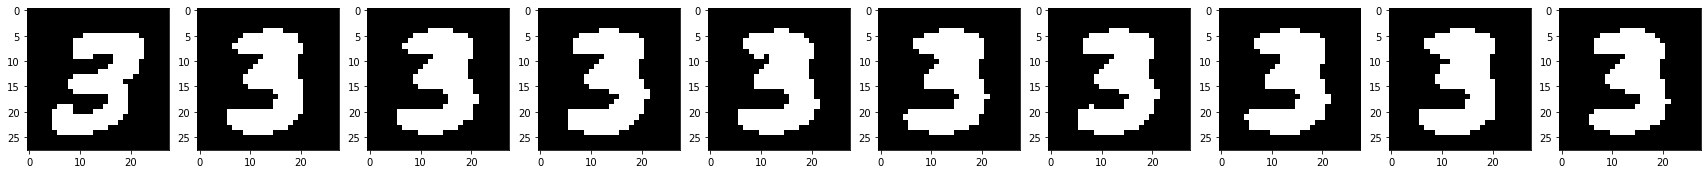

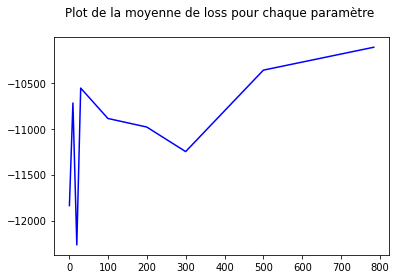

In [ ]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()
extracted=X_train[y_train==3]#[:1000]
target_samples=torch.tensor(extracted>0.5).reshape(extracted.shape[0], 28*28).float()


batch_size= 64
epochs=15
lr=0.01 # learning rate
n_iter=100 ## nombre d'itérations estimateur de Gibbs



def estim(h_dim,rbm,batch_size,epochs,lr,n_iter):
  ma_mse = rbm.train(target_samples,epochs,batch_size,lr,n_iter)
  return ma_mse


liste_h=[1,10,20,30,100,200,300,500,784]

#rbm.train(target_samples,epochs,batch_size,lr,n_iter)


def test_hdim(liste_h,batch_size,epochs,lr,n_iter):

  result=[]

  image=target_samples[0]
  fig=plt.figure(figsize=(30,10))

  for i,hdim in enumerate(liste_h) :

    ### Initialisation d'un objet de la classe RBM
    rbm = RBM(target_samples.shape[1],h_dim)
    if i==0 :
      fig.add_subplot(1,len(liste_h)+1,1)
      rbm.plot_v(image,fig)

    ma_mse = estim(h_dim,rbm,batch_size,epochs,lr,n_iter)
    result.append(ma_mse)

    ### Test des performances du modèle

    x_=rbm.visible_cache(rbm.cache_visible(image))
    fig.add_subplot(1,len(liste_h)+1,i+2)
    rbm.plot_v(x_,fig)
  plt.show()
  return result

result=test_hdim(liste_h,batch_size,epochs,lr,n_iter)

plt.plot(liste_h, result, c='b')
plt.title("Plot de la moyenne de loss pour chaque paramètre \n")
plt.show()

### **Remarques** : 

#### On remarque que la rmse la plus faible correspond à la couche cachée ayant pour dilmension  100.

## **Faisons varier la variable lr (learning rate) pour en évaluer l'impact sur l'entrainement de notre modèle**

#### En Machine Learning, on appelle ce genre de facteur un Hyper-paramètre, parce qu’il n’est pas à proprement parler un paramètre de notre modèle, mais il a tout de même un impact sur la performance finale de notre modèle (tout comme les paramètres du modèle).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


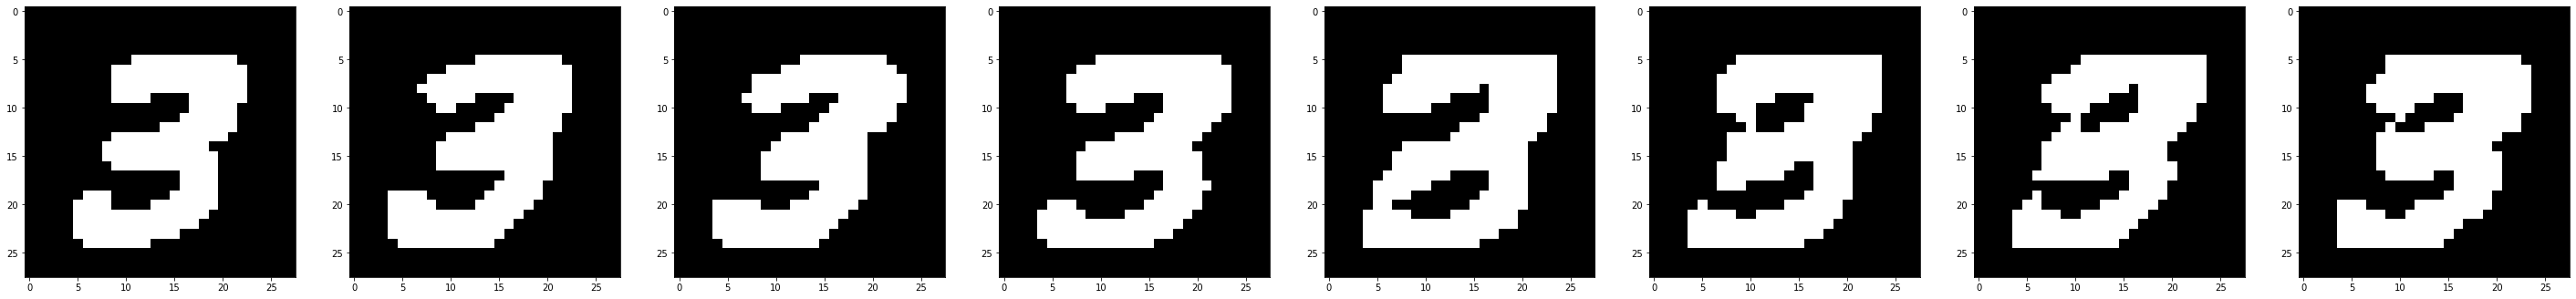

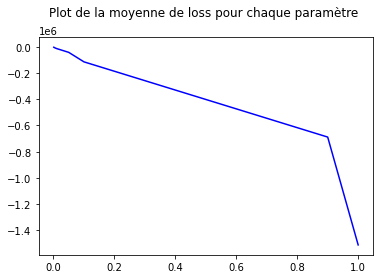

In [ ]:
liste_lr=[0.001, 0.005 ,0.01,0.05,0.1, 0.9, 1]

batch_size= 64#100 #784 #nb_samples[1]
epochs=15

h_dim=200
n_iter=100 ## nombre d'itérations estimateur de Gibbs


def test_lr(liste_lr,h_dim,batch_size,epochs,n_iter):

  result=[]

  ### Initialisation d'un objet de la classe RBM
  rbm = RBM(target_samples.shape[1],h_dim)
  image=target_samples[0]
  fig=plt.figure(figsize=(50,10))#plt.figure(figsize=(((5,5))))

  fig.add_subplot(1,len(liste_lr)+1,1)
  rbm.plot_v(image,fig)

  for i, lr in enumerate(liste_lr) :

    ma_mse = estim(h_dim,rbm,batch_size,epochs,lr,n_iter)
    result.append(ma_mse)

    ### Test des performances du modèle

    x_=rbm.visible_cache(rbm.cache_visible(image))#.detach().numpy()
    fig.add_subplot(1,len(liste_lr)+1,i+2)
    rbm.plot_v(x_,fig)
  plt.show()
  return result

result=test_lr(liste_lr,h_dim,batch_size,epochs,n_iter)

plt.plot(liste_lr, result, c='b')
plt.title("Plot de la moyenne de loss pour chaque paramètre \n")
plt.show()

### **Commentaires**: 

#### - Pour lr trop grand, on effectue de trop grands pas dans la descente de gradient. Cela a l’avantage de descendre rapidement vers le minimum de la fonction coût, mais il y a risque d'avoir moins de précision en loupant. le minimum local , et 

![](https://drive.google.com/uc?export=view&id=1T3B0aN_mmWLXxKzm06w4x13C914Ad4lO)

#### - Mais pour lr trop faible, on risque de mettre un temps infini avant de converger vers le minimum de la fonction cout. C’est un peu comme choisir d’avancer millimètre par millimètre dans une montagne pour trouver le point le plus bas de la vallée. On obtient malgé tout, de meilleurs résultats pour des valeurs petites de learning rate (0.001 - 0.01) 

![](https://drive.google.com/uc?export=view&id=1werwfk-Gzf4r4AcjWuL7Nx30YRpeMNPu)

#### Pour trouver le bon Learning Rate, il n’existe malheureusement pas de formule magique. On doit le plus soiuvent tâtonner et essayer plusieurs valeurs avant de trouver la bonne. C'est ce qu'on appelle l’Hyperparameter Tuning (le réglage des hyper-paramètres)

#### Nous retiendrons cependant qu'un bon learning rate, dans notre étude correspond à lr = 0.001.

## **Faisons varier la variable epochs pour en évaluer l'impact sur l'entrainement de notre modèle**

#### La variable epochs joue un rôle important dans la modélisation de l'apprentissage automatique, car cette valeur est essentielle pour trouver le modèle qui représente l'échantillon avec moins d'erreur. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


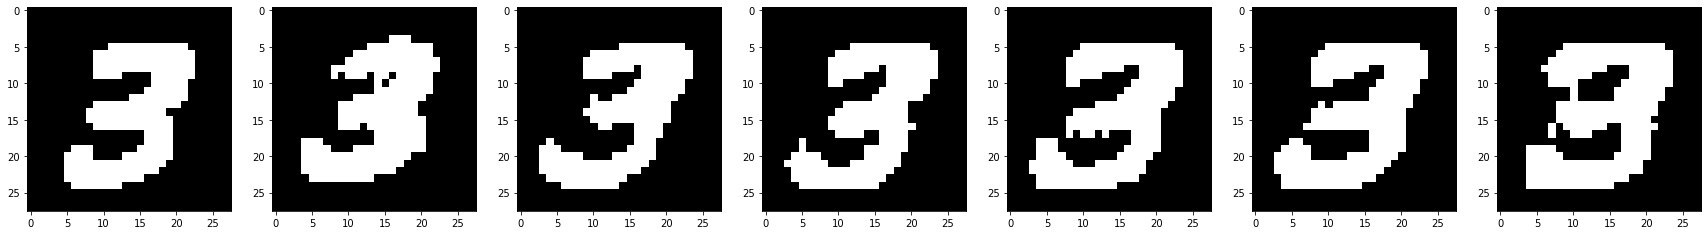

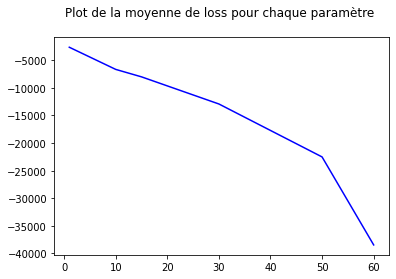

In [ ]:
liste_epochs=[1, 10, 15,30 ,50, 60]

batch_size= 64#100 #784 #nb_samples[1]

lr=0.01
h_dim=200
n_iter=100 ## nombre d'itérations estimateur de Gibbs


def test_epochs(liste_epochs,h_dim,batch_size,lr,n_iter):

  result=[]

  ### Initialisation d'un objet de la classe RBM
  rbm = RBM(target_samples.shape[1],h_dim)
  image=target_samples[0]
  fig=plt.figure(figsize=(30,10))#plt.figure(figsize=(((5,5))))

  fig.add_subplot(1,len(liste_epochs)+1,1)
  rbm.plot_v(image,fig)

  for i, epochs_t in enumerate(liste_epochs) :

    ma_mse = estim(h_dim,rbm,batch_size,epochs_t,lr,n_iter)
    result.append(ma_mse)

    ### Test des performances du modèle

    x_=rbm.visible_cache(rbm.cache_visible(image))#.detach().numpy()
    fig.add_subplot(1,len(liste_epochs)+1,i+2)
    rbm.plot_v(x_,fig)
  plt.show()
  return result

result=test_epochs(liste_epochs,h_dim,batch_size,lr,n_iter)

plt.plot(liste_epochs, result, c='b')
plt.title("Plot de la moyenne de loss pour chaque paramètre \n")
plt.show()

## **Commentaires** :

#### Plus le nombre d' epochs est grand plus on obtient une bonne précision, mais bien sur plus c’est long.

## Faisons varier la variable n_iter (nombres d'itérations de Gibbs)  pour en évaluer l'impact sur l'entrainement de notre modèle

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


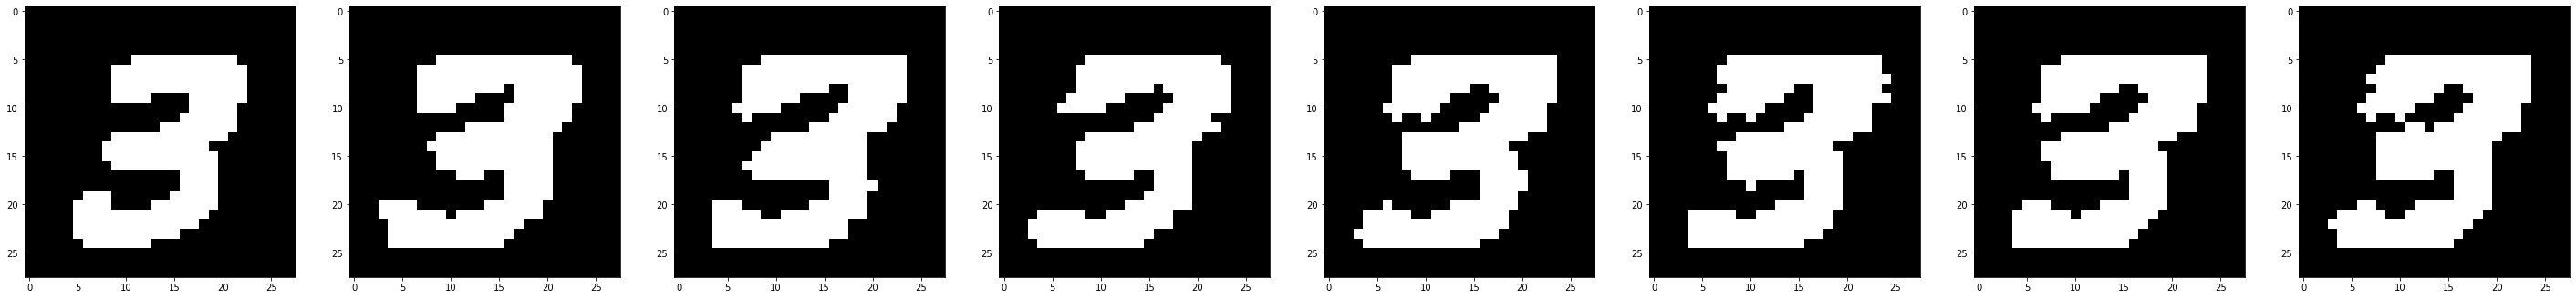

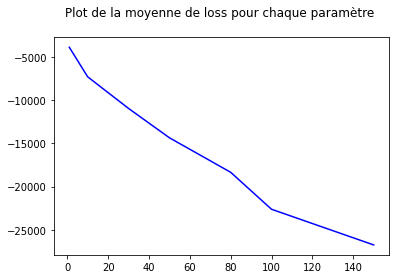

In [ ]:
liste_niter=[1,10,30, 50 ,80,100,150]#, 200,500,1000]

batch_size= 64
epochs=15
lr=0.01
h_dim=200



def test_niter(liste_niter,h_dim,batch_size,epochs,lr):

  result=[]

  ### Initialisation d'un objet de la classe RBM
  rbm = RBM(target_samples.shape[1],h_dim)
  image=target_samples[0]
  fig=plt.figure(figsize=(50,10))

  fig.add_subplot(1,len(liste_niter)+1,1)
  rbm.plot_v(image,fig)

  for i, n_iter in enumerate(liste_niter) :

    ma_mse = estim(h_dim,rbm,batch_size,epochs,lr,n_iter)
    result.append(ma_mse)

    ### Test des performances du modèle

    x_=rbm.visible_cache(rbm.cache_visible(image))
    fig.add_subplot(1,len(liste_niter)+1,i+2)
    rbm.plot_v(x_,fig)
  plt.show()
  return result

result=test_niter(liste_niter,h_dim,batch_size,epochs,lr)

plt.plot(liste_niter, result, c='b')
plt.title("Plot de la moyenne de loss pour chaque paramètre \n")
plt.show()

## **Faisons varier la variable batch_size (taille de batch)  pour en évaluer l'impact sur l'entrainement de notre modèle**

#### La taille des batch size est l'un des hyperparamètres les plus importants dans les systèmes modernes d'apprentissage en profondeur. On utilise souvent utiliser une taille de batch élevée pour former leur modèle car cela permet des accélérations de calcul, grâce au parallélisme des GPU. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


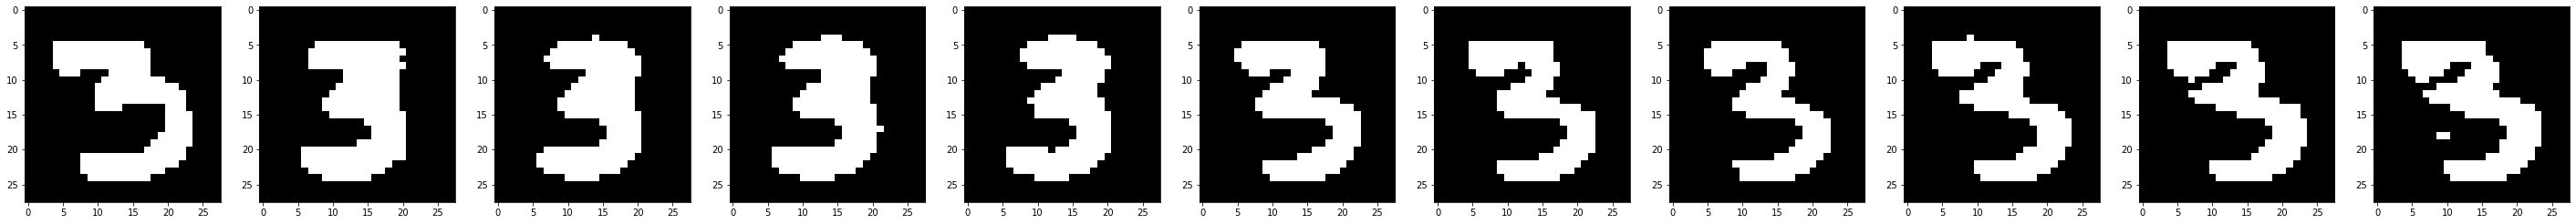

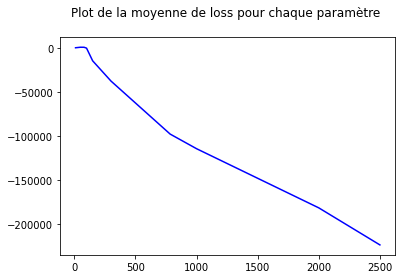

In [ ]:
liste_batch=[10, 50 ,80,100,150, 300,784,1000, 2000,2500]

#batch_size= 100 #784 #nb_samples[1]
epochs=15
lr=0.01
h_dim=10
n_iter=100 ## nombre d'itérations estimateur de Gibbs


def test_batch(liste_batch,h_dim,epochs,lr,n_iter):

  result=[]

  ### Initialisation d'un objet de la classe RBM
  rbm = RBM(target_samples.shape[1],h_dim)
  image=target_samples[100]
  fig=plt.figure(figsize=(50,10))#plt.figure(figsize=(((5,5))))

  fig.add_subplot(1,len(liste_batch)+1,1)
  rbm.plot_v(image,fig)

  for i, batch_size in enumerate(liste_batch) :

    ma_mse = estim(h_dim,rbm,batch_size,epochs,lr,n_iter)
    result.append(ma_mse)

    ### Test des performances du modèle

    x_=rbm.visible_cache(rbm.cache_visible(image))#.detach().numpy()
    fig.add_subplot(1,len(liste_batch)+1,i+2)
    rbm.plot_v(x_,fig)
  plt.show()
  return result

result=test_batch(liste_batch,h_dim,epochs,lr, n_iter)

plt.plot(liste_batch, result, c='b')
plt.title("Plot de la moyenne de loss pour chaque paramètre \n")
plt.show()

### **Commentaires** :

####- Une trop grande taille de batch, on le sait conduit à une mauvaise généralisation. Pour le type de fonctions (convexes) que nous essayons d'optimiser, il existe un bras de fer inhérent entre les avantages des tailles de batch plus petites et plus grandes.

#### - L'utilisation d'une taille de batch égale à celle de l'ensemble de données complet garantit la convergence vers l'optimum global de la fonction objectif (comme le montre les images ci-dessus pour batch_size=1000. 

####- Cela se fait, cependant au prix d'une convergence empirique plus lente vers cet optimum et il a été démontré empiriquement que l'utilisation de batch de plus petite taille permet une convergence plus rapide vers de « bonnes » solutions (cela se justifie par le fait que des tailles de batch plus petites permettent au modèle de "commencer à apprendre avant d'avoir à voir toutes les données").

####- L'inconvénient d'utiliser une taille de batch plus petite est qu'il n'est pas garanti que le modèle converge vers les optima globaux. Il rebondira autour des optima globaux, restant en dehors d'une ϵ-ball des optima où ϵ dépend du rapport entre la taille du lot et la taille de l'ensemble de données. 

#### Sans aucune contrainte de calcul, il est donc souvent conseillé de commencer avec une petite taille de lot, en récoltant les avantages d'une dynamique de formation plus rapide, et d'augmenter régulièrement la taille du batch grâce à l'entrainement, en récoltant également les avantages d'une convergence garantie.

### **Remarques**
#### Certains travaux dans la littérature sur l'optimisation ont montré que l'augmentation du taux d'apprentissage peut compenser des tailles de lots plus importantes.

#### Ici nous prendrons batch_size = 100

### **Test modèle final**


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


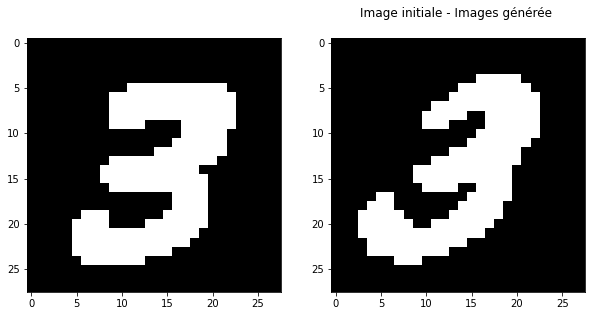

In [ ]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()
extracted=X_train[y_train==3][:1000]
target_samples=torch.tensor(extracted>0.5).reshape(extracted.shape[0], 28*28).float()

## Les paramètres de test

batch_size= 100 
epochs=20
h_dim=500
lr=0.001 
n_iter=50 

def estim(h_dim,rbm,batch_size,epochs,lr,n_iter):
  ma_mse = rbm.train(target_samples,epochs,batch_size,lr,n_iter)
  return ma_mse

image=target_samples[0]
fig=plt.figure(figsize=(10,5))#plt.figure(figsize=(((5,5))))
fig.add_subplot(1,2,1)
rbm.plot_v(image,fig)


### Initialisation d'un objet de la classe RBM
rbm = RBM(target_samples.shape[1],h_dim)

## Entrainement 
ma_mse = estim(h_dim,rbm,batch_size,epochs,lr,n_iter)

## Test
x_=rbm.visible_cache(rbm.cache_visible(image))#.detach().numpy()
fig.add_subplot(1,2,2)
rbm.plot_v(x_,fig)
plt.title("Image initiale - Images générée \n")
plt.show()

